<a href="https://colab.research.google.com/github/Yash-Pandey007/Flower_classification/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashpandey03
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset


100%|██████████| 0.99k/0.99k [00:00<00:00, 1.74MB/s]

In [6]:
import pandas as pd
import zipfile

# 1. Unzip the File (if needed):
zip_file_path = 'iris-flower-dataset.zip' # Path to your ZIP file (downloaded location)
extract_dir = './iris-flower-dataset'  # Directory to extract to

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
except FileNotFoundError:
    print(f"Error: The file '{zip_file_path}' was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file '{zip_file_path}' is not a valid ZIP file.")


# 2. Read the CSV into a DataFrame:
csv_file_path = './iris-flower-dataset/IRIS.csv'  # Path to the CSV file inside the extracted folder

try:
    df = pd.read_csv(csv_file_path)
    print("Successfully read the CSV file into a Pandas DataFrame.")
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file '{csv_file_path}' is empty.")
except pd.errors.ParserError:
    print(f"Error: There was an error parsing the CSV file '{csv_file_path}'. Check the file format.")

Error: The file 'iris-flower-dataset.zip' was not found.
Successfully read the CSV file into a Pandas DataFrame.
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


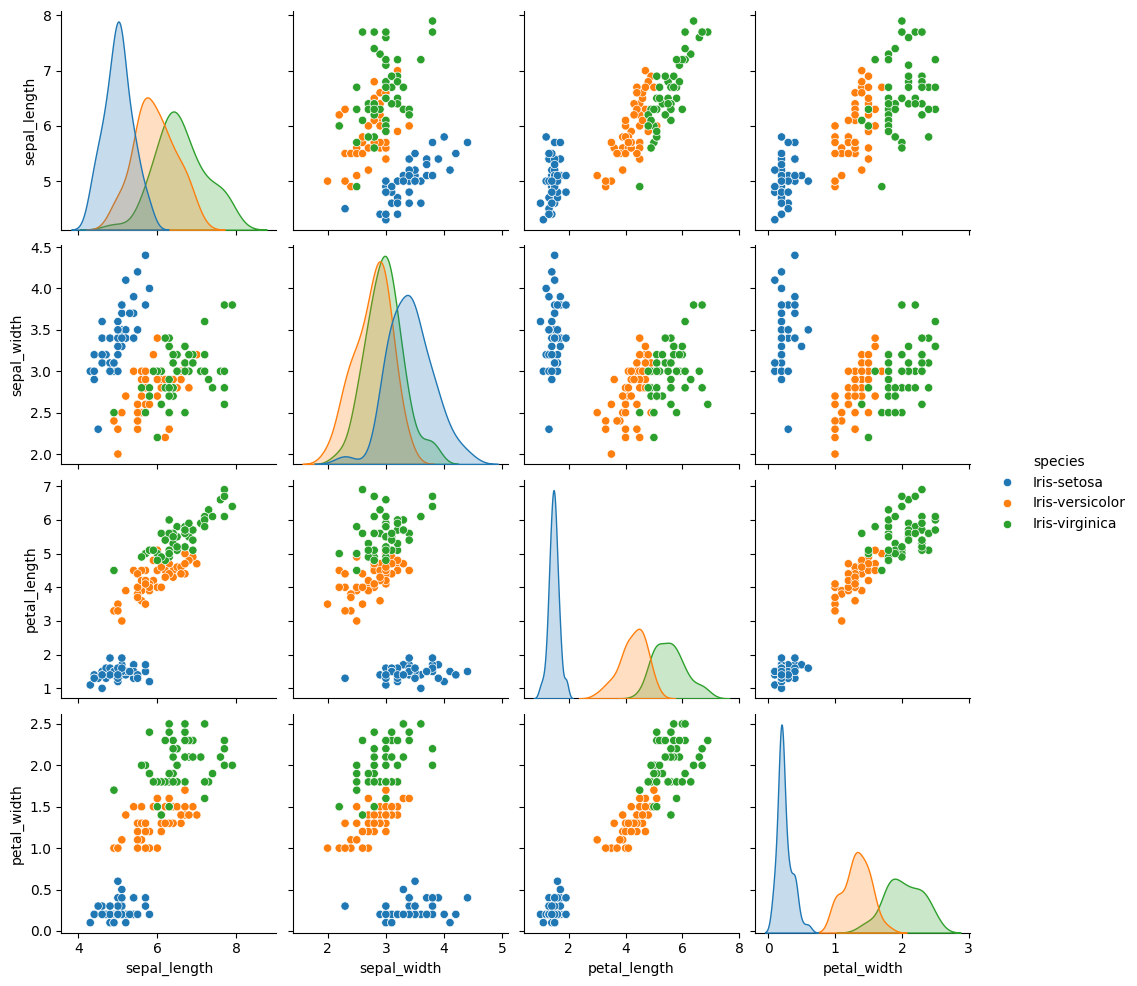

In [11]:
sns.pairplot(df,hue='species')
plt.show()

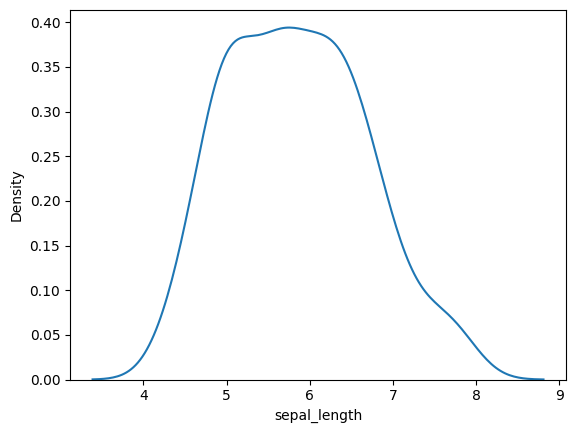

In [12]:
sns.kdeplot(df['sepal_length'])
plt.show()

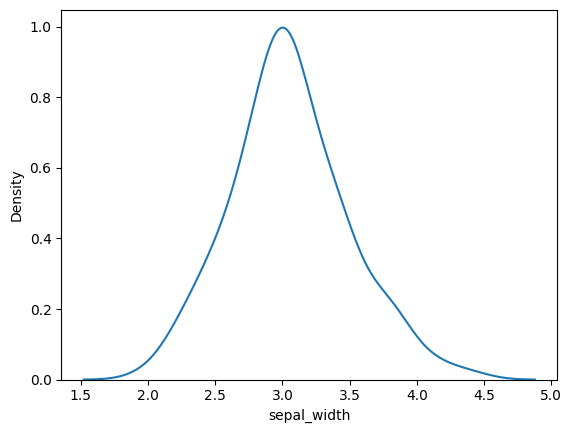

In [13]:
sns.kdeplot(df['sepal_width'])
plt.show()

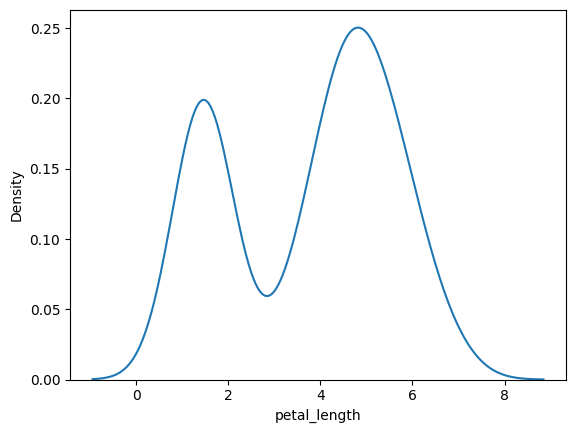

In [14]:
sns.kdeplot(df['petal_length'])
plt.show()

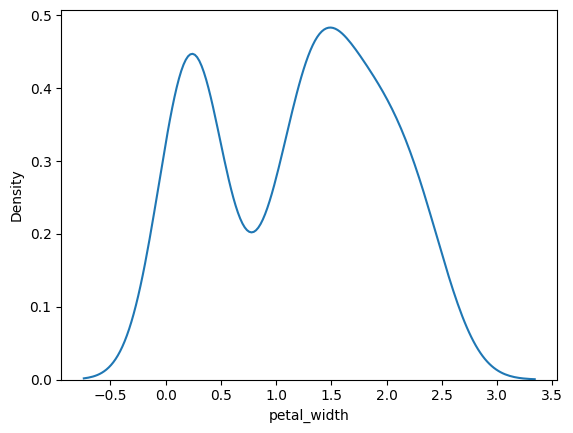

In [15]:
sns.kdeplot(df['petal_width'])
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [17]:
x=df.drop('species',axis=1)
y=df['species']

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9555555555555556
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9555555555555556
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [22]:
from sklearn.svm import SVC
svcl = SVC(kernel='linear')
svcl.fit(x_train,y_train)
y_pred=svcl.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9777777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [23]:
from sklearn.svm import SVC
svcr = SVC(kernel='rbf')
svcr.fit(x_train,y_train)
y_pred=svcr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9555555555555556
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9777777777777777
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [25]:
! git clone https://github.com/Yash-Pandey007/Flower_classification.git

Cloning into 'Flower_classification'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 357.65 KiB | 1.92 MiB/s, done.
